동물 7종류 분류하기 
털, 날개, 알, 우유 등등의 요소로 동물을 분류하는 문제입니다

데이터 획득
정제 cleaning (누락, 이상치)
분포 확인
특징 선택 - 사용할 것, 사용하지 못하는 것
데이터 타입 확인 - 수치 or 카테고리 or 시간
정규화 방법 - MinMax, 평균 - 표준 편차 정규화
입력 출력 분리(X,Y)
학습용 검증용 분리(train, test)
fit 
성능 측정 - 일반화(generalize), 과소적합(under fitting), 과대적합(over fitting)
결과 시각화

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('C:/Users/1/Downloads/zoo.data',header=None)
df.shape

(101, 18)

In [30]:
#누락 갯수 확인
df.isna().sum().sum() # nan : not a number , nas: not a string nai:not a int

0

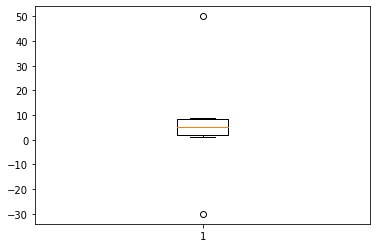

In [38]:
x = [7,8,9,1,2,3,50, - 30]
p = plt.boxplot(x) # 데이터의 분포 파악에 용이 

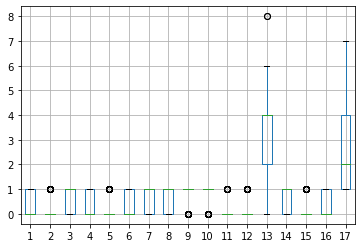

In [31]:
df.boxplot()

In [44]:
#조건부 검색 : 데이터[조건] : boolean mask indexing
x = np.array([1,2,3,10,11]) # 10이상의 값을 뽑고싶다
cond = x>=10
x[cond]

array([10, 11])

In [42]:
df[df[13]==8]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
53,octopus,0,0,1,0,0,1,1,0,0,0,0,0,8,0,0,1,7
72,scorpion,0,0,0,0,0,0,1,0,0,1,1,0,8,1,0,0,7


In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


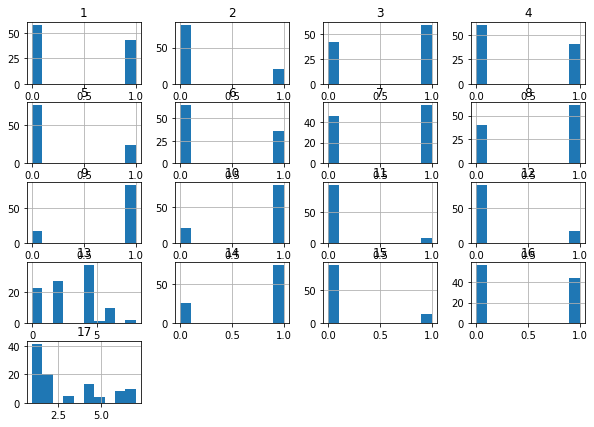

In [23]:
h = df.hist(figsize=(10,7))

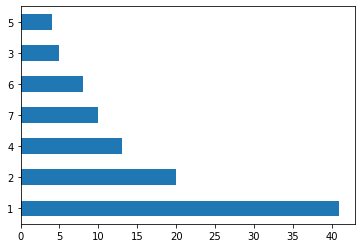

In [46]:
df[17].value_counts().plot.barh()

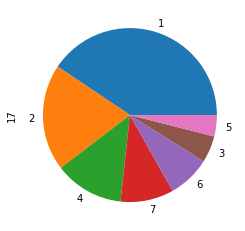

In [17]:
df[17].value_counts().plot.pie()

In [47]:
from sklearn.preprocessing import MinMaxScaler, label_binarize

In [53]:
data = np.array(df)
x = data[:,1:-1]
y = data[:,-1]
data.shape

(101, 18)

In [54]:
scaler = MinMaxScaler()

In [55]:
x_norm = scaler.fit_transform(x)

In [67]:
y = y.astype(np.int)

In [71]:
y_one_hot = label_binarize(y, list(set(y)))

In [73]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [77]:
model = LogisticRegression(solver='lbfgs', multi_class='auto').fit(x_norm, y)

In [78]:
model.score(x_norm, y) # 정확도 accuracy

0.9900990099009901

In [95]:
import tensorflow as tf
import tensorflow.contrib.layers as layers
from sklearn.metrics import accuracy_score

In [117]:
z = layers.fully_connected(x_norm, 7, activation_fn=None)#Dense, Matrix Multiple
h = tf.nn.softmax(z)# score 를 prob 로 변환
cost = - tf.reduce_mean(y_one_hot * tf.log(h)) # Cross Entropy
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
sess = tf.Session()
sess.run(tf.global_variables_initializer())
h

<tf.Tensor 'Softmax_5:0' shape=(101, 7) dtype=float64>

In [125]:
for i in range(100):
    _ , c_, h_ = sess.run([train, cost, h])
    if i%10==0:
        acc = accuracy_score(y, np.argmax(h_, axis=1) )
        print(i, acc, c_)        

0 0.0 0.16033297688742204
10 0.0 0.15975530730646448
20 0.0 0.15918893273664741
30 0.0 0.15863350993040332
40 0.0 0.1580887057438495
50 0.0 0.15755419696519624
60 0.0 0.15702967013288419
70 0.0 0.15651482134503375
80 0.0 0.15600935606166397
90 0.0 0.15551298890102028
